Important Packages 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### Exploratory Data Analysis

In [2]:
Data = pd.read_csv (r"E:\Data Science\Black Friday\train.csv")

In [3]:
Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### UNIVARIANT ANALYSIS

In [4]:
Data ['Product_ID'].value_counts(dropna = False)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [5]:
Data ['User_ID'].value_counts(dropna = False)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


##### Comment : As we know that "Product Id" and "User_ID" both are unique keys so, we can drop them. This will make our EDA more convinient.

In [7]:
Data.drop (columns = ['User_ID', 'Product_ID'], inplace = True)

##### GENDER & AGE

In [8]:
Data ['Gender'].value_counts(dropna = False)

M    414259
F    135809
Name: Gender, dtype: int64

C:\Users\anami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


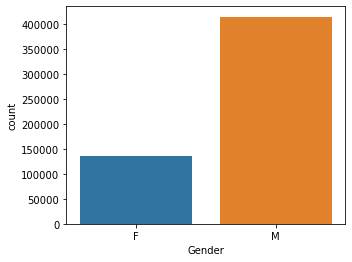

In [9]:
plt.figure (figsize = (5,4))
sns.countplot (Data ['Gender'])
plt.show()

ANALYSIS : As per the above analysis we can see that in our data the ratio of Male are higher than Female. It's almost 3 times more, where the Males are 414259 and Females are 135809.

In [10]:
Data ['Age'].value_counts(dropna = False)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

C:\Users\anami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


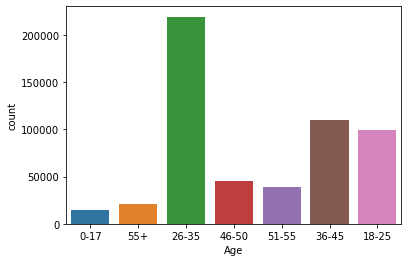

In [11]:
sns.countplot (Data ['Age'])
plt.show()

In [12]:
Data_Male = Data.loc[(Data["Gender"]=='M') & (Data ["Age"]== '26-35')]
Data_Male

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
5,M,26-35,15,A,3,0,1,2.0,NaN,15227
9,M,26-35,20,A,1,1,8,NaN,NaN,7871
10,M,26-35,20,A,1,1,5,11.0,NaN,5254
11,M,26-35,20,A,1,1,8,NaN,NaN,3957
12,M,26-35,20,A,1,1,8,NaN,NaN,6073
...,...,...,...,...,...,...,...,...,...,...
550034,M,26-35,15,B,1,1,20,NaN,NaN,479
550055,M,26-35,0,A,4+,0,20,NaN,NaN,238
550056,M,26-35,17,C,4+,0,20,NaN,NaN,254
550057,M,26-35,0,C,2,1,19,NaN,NaN,61


In [13]:
Data_Female = Data.loc[ (Data["Gender"]=='F') & (Data ["Age"]== '26-35')]
Data_Female

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
47,F,26-35,1,C,1,0,8,17.0,NaN,6171
48,F,26-35,1,C,1,0,1,2.0,5.0,19327
49,F,26-35,1,C,1,0,8,13.0,NaN,8027
124,F,26-35,7,A,3,1,8,NaN,NaN,2230
125,F,26-35,7,A,3,1,5,8.0,NaN,6940
...,...,...,...,...,...,...,...,...,...,...
550051,F,26-35,20,C,3,0,20,NaN,NaN,489
550059,F,26-35,1,B,1,0,19,NaN,NaN,48
550061,F,26-35,1,C,1,1,20,NaN,NaN,599
550064,F,26-35,1,C,3,0,20,NaN,NaN,371


C:\Users\anami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


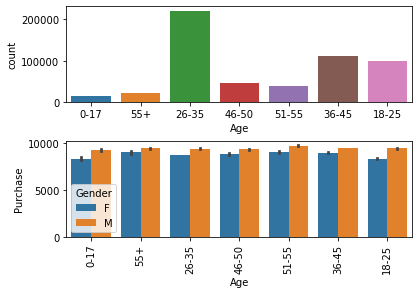

In [14]:
plt.subplot(211)

sns.countplot (Data ['Age'])

plt.subplot(212)

sns.barplot(data=Data,x='Age',y='Purchase',hue='Gender')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                   bottom=0.1, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.4, 
                   hspace=0.4)

plt.show()

ANALYSIS: As per the above analysis, we can see various age groups, but the highest no. of Age Group is between "26-35" in which males are more than females.

##### OCCUPATION

In [15]:
Data ['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

C:\Users\anami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


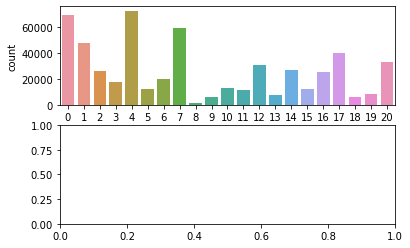

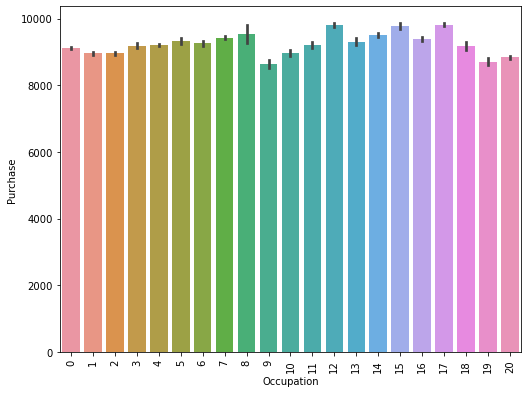

In [16]:
plt.subplot(211)

sns.countplot (Data ['Occupation'])

plt.subplot(212)
plt.figure (figsize = (8,6))
sns.barplot(data=Data,x='Occupation',y='Purchase')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                   bottom=0.1, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.7, 
                   hspace=0.7)

plt.show()

ANALYSIS : As per the above analysis, we can see that there are mutiple occupations given in the form of integer. Surely, each no. will be related to an occupation, which we don't know what the occupation is of the people who are the most frequent in our data.
In the first graph 4 no. occupation has the highest count and 8 no.Occupation has the least count.
But in the second graph, when we see the count in respective to Purchase which is our "Target Variable" then there is no drastic difference between highest one and lowest one.  

##### CITY CATEGORY

In [17]:
Data ['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

C:\Users\anami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


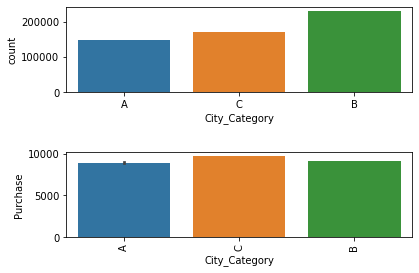

In [18]:
plt.subplot(211)

sns.countplot (Data ['City_Category'])

plt.subplot(212)

sns.barplot(data=Data,x='City_Category',y='Purchase')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                   bottom=0.1, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.7, 
                   hspace=0.7)

plt.show()

ANALYSIS : As per the above analysis we can see "City B" has the maximum count but maximum purchase has made by "City C"  

##### STAY IN CURRENT CITY YEARS

In [19]:
Data ['Stay_In_Current_City_Years'].value_counts(dropna = False)

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

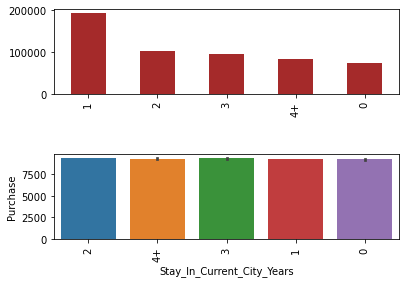

In [20]:
plt.subplot(211)

Data ['Stay_In_Current_City_Years'].value_counts().plot(kind ='bar', color = 'brown')

plt.subplot(212)
sns.barplot(data=Data,x='Stay_In_Current_City_Years',y='Purchase')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                   bottom=0.1, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.7, 
                   hspace=0.7)

plt.show()

ANALYSIS : According to this graph we can analyse that we have maximum count of those people who are staying for just 1 year in a city. The people who are staying for less time are purchasing more product than others may be due to stability they had to purchase the products for thier home or for the survivals.

##### MARITAL STATUS 

In [21]:
Data ['Marital_Status'].value_counts(dropna=False)

0    324731
1    225337
Name: Marital_Status, dtype: int64

C:\Users\anami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


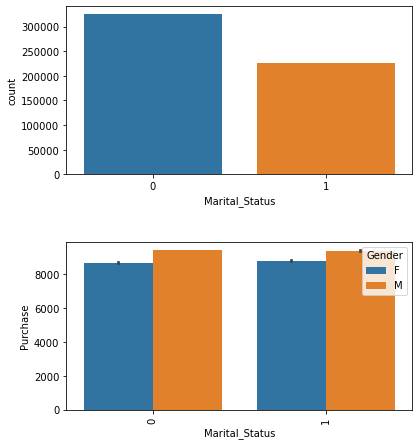

In [22]:
plt.figure (figsize = (6,7))
plt.subplot(211)

sns.countplot (Data ['Marital_Status'])

plt.subplot(212)

sns.barplot(data=Data,x='Marital_Status',y='Purchase',hue='Gender')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                   bottom=0.1, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.4, 
                   hspace=0.4)

plt.show()

##### PRODUCT CATEGORIES

In [23]:
Data ['Product_Category_1'].value_counts(dropna = False)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

<AxesSubplot:>

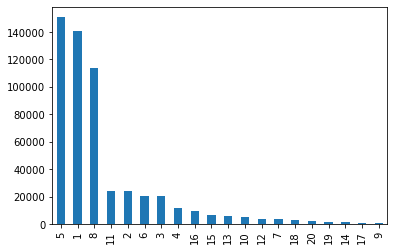

In [24]:
Data ['Product_Category_1'].value_counts().plot(kind ='bar')

Comment : As per the above analysis category 5 of 'Product_Catergory_1' has the maximum count which is 150933 and category 9 has the minimum count which is 410. As of now we cannot assume that which kind of product falls under this category.

In [25]:
Data ['Product_Category_2'].value_counts(dropna = False)

NaN     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

<AxesSubplot:>

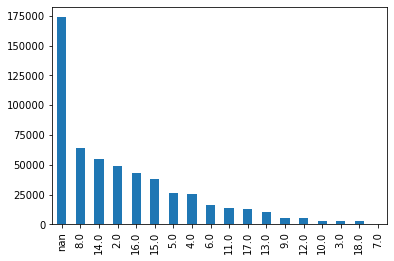

In [26]:
Data ['Product_Category_2'].value_counts(dropna = False).plot (kind ='bar')

In [27]:
Data ['Product_Category_3'].value_counts(dropna = False)

NaN     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

<AxesSubplot:>

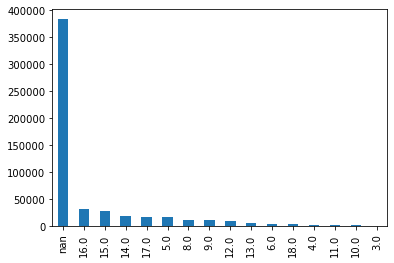

In [28]:
Data ['Product_Category_3'].value_counts(dropna = False).plot(kind = 'bar')

ANALYSIS : As per the above 2 variant's analysis, we can see that the maximum count of product categories are unknown, filled with NaN, means these are missing values. For the further analysis if we don't want to drop the variables then we can fill these missing product categories with some natural number. A no. that stands out from the whole data.

##### PURCHASE (TARGET VARIABLE)

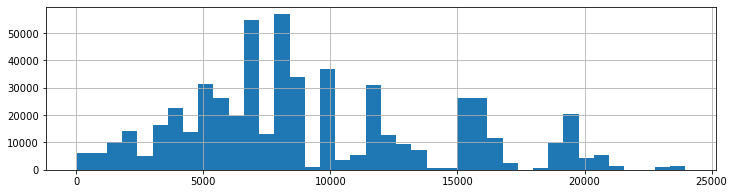

In [29]:
Data['Purchase'].hist(bins=40,figsize=(12,3));
# This plot is represting that maximum purchase is between 5000-10000

## BIVARIANT ANALYSIS

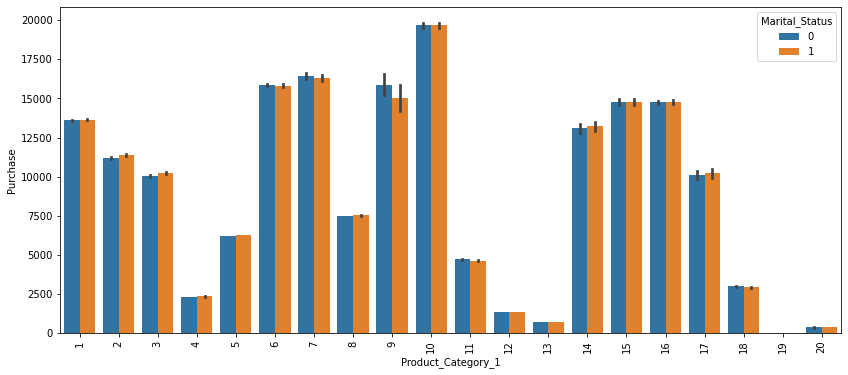

In [30]:
plt.figure(figsize=[14,6])

sns.barplot(data=Data,x='Product_Category_1',y='Purchase',hue='Marital_Status')

plt.xticks(rotation=90)

plt.show()

In [31]:
Data [(Data ['Gender']=='M') & (Data ['Marital_Status']==0)& (Data ['City_Category']== 'A')]

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
5,M,26-35,15,A,3,0,1,2.0,NaN,15227
56,M,26-35,7,A,1,0,1,8.0,NaN,19653
57,M,26-35,7,A,1,0,8,16.0,NaN,5958
58,M,26-35,7,A,1,0,1,16.0,NaN,11415
59,M,26-35,7,A,1,0,5,8.0,NaN,5380
...,...,...,...,...,...,...,...,...,...,...
549964,M,26-35,7,A,0,0,19,NaN,NaN,38
549967,M,26-35,0,A,4+,0,19,NaN,NaN,61
550026,M,26-35,14,A,1,0,19,NaN,NaN,62
550055,M,26-35,0,A,4+,0,20,NaN,NaN,238


Text(0.5, 1.0, 'Highest Purchasing Age Group')

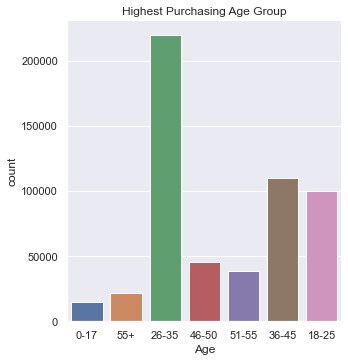

In [32]:
sns.set(style= "darkgrid")
sns.catplot(x="Age", kind="count",data=Data);
plt.title('Highest Purchasing Age Group')

Text(0.5, 1.0, 'Ratio of Purchase Made By Gender')

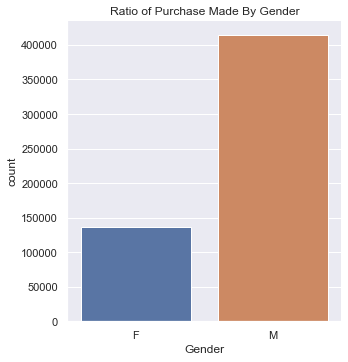

In [33]:
sns.set(style= "darkgrid")
sns.catplot(x="Gender", kind="count",data=Data);
plt.title('Ratio of Purchase Made By Gender')

Text(0.5, 1.0, 'Total Purchase Made City Wise')

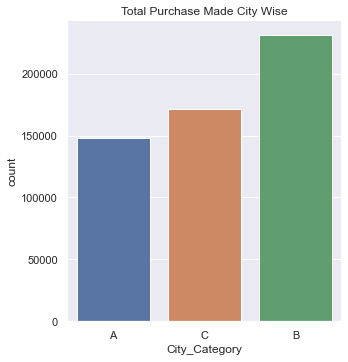

In [34]:
sns.set(style= "darkgrid")
sns.catplot(x="City_Category", kind="count",data=Data);
plt.title('Total Purchase Made City Wise')

### MISSING VALUE TREATMENT

In [35]:
Data['Product_Category_2'] =Data['Product_Category_2'].fillna(0).astype('int64')
Data['Product_Category_3'] =Data['Product_Category_3'].fillna(99).astype('int64')

In [36]:
Data1 = Data.copy()

#### CONVERSION FROM CATEGORICAL TO NUMERICAL 

In [37]:
from sklearn import preprocessing

In [38]:
LE = preprocessing.LabelEncoder()

In [39]:
Data1['Gender']= LE.fit_transform(Data1['Gender'])

Data1['Age']= LE.fit_transform (Data1['Age'])

Data1['City_Category']= LE.fit_transform(Data1['City_Category'])

Data1['Stay_In_Current_City_Years']= LE.fit_transform(Data1['Stay_In_Current_City_Years'])

In [40]:
Data1.dtypes

Gender                        int32
Age                           int32
Occupation                    int64
City_Category                 int32
Stay_In_Current_City_Years    int32
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int64
Product_Category_3            int64
Purchase                      int64
dtype: object

<AxesSubplot:>

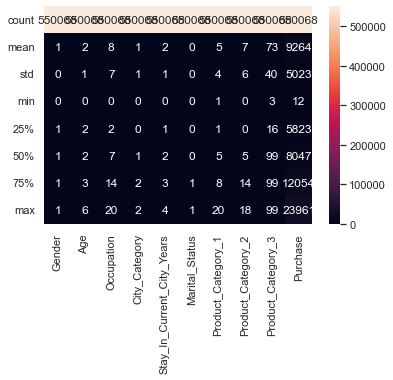

In [41]:
# Visuals of stats of whole dataset
sns.heatmap(Data1.describe(), annot = True, fmt = '0.0f')

### DATA MODELING

#### ALGORITHM - LINEAR REGRESSION

In [42]:
#Splitting the DATA
y=Data1["Purchase"]
X=Data1.drop(columns=["Purchase"])

In [43]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=45)

In [44]:
LR = LinearRegression()

In [45]:
LR.fit(X_train, y_train)

LinearRegression()

In [46]:
print("LR Train Score :", LR.score(X_train, y_train))
print("LR Test Score  :", LR.score(X_test, y_test))

LR Train Score : 0.15590915910673198
LR Test Score  : 0.15833355827912377


In [47]:
y_pred_train = LR.predict(X_train)
y_pred_train

array([ 7765.15766265,  7780.12434769, 11279.40803994, ...,
       11773.13850122,  7972.37461452, 11812.33526617])

In [48]:
y_pred_test = LR.predict(X_test)
y_pred_test

array([ 6958.145768  ,  9763.22653901,  8393.71975663, ...,
       10482.63346727, 11630.62774526,  9200.99828482])

In [49]:
# FINDING RMSE AND MSE THROUGH NUMPY

# print("Train MSE :", np.mean((y_train-y_pred_train)**2))
# print("Test MSE :", np.mean((y_test-y_pred_test)**2))

# print("Train RMSE :", np.sqrt(np.mean((y_train-y_pred_train)**2)))
# print("Test RMSE :", np.sqrt(np.mean((y_test-y_pred_test)**2)))

In [50]:
# PACKAGEs TO GET RMSE AND MSE 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [51]:
LR_MSE = round (mean_squared_error(y_test, y_pred_test),2)
LR_RMSE = round (sqrt(mean_squared_error(y_test, y_pred_test)),2)
LR_R2_score = round (r2_score (y_test, y_pred_test),2)
LR_MAE = round (mean_absolute_error (y_test, y_pred_test),2)

print (LR_MSE)
print (LR_RMSE)
print (LR_R2_score)
print (LR_MAE)

21294021.2
4614.54
0.16
3518.82


#### ALGORITHM - DECISION TREE [REGRESSOR]

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
DtR = DecisionTreeRegressor(random_state=89)

DtR.fit(X_train, y_train)

print("Train Accuracy :", DtR.score(X_train,y_train))
print("Test Accuracy  :", DtR.score(X_test,y_test))

Train Accuracy : 0.8026586623261507
Test Accuracy  : 0.561583746459331


In [55]:
#help(DtR)

#DecisionTreeRegressor(*, criterion='mse', 
#                      splitter='best', max_depth=None, 
#                      min_samples_split=2, min_samples_leaf=1, 
#                      min_weight_fraction_leaf=0.0, max_features=None, 
#                      random_state=None, max_leaf_nodes=None, 
#                      min_impurity_decrease=0.0, min_impurity_split=None, 
#                      ccp_alpha=0.0)

In [56]:
DtR = DecisionTreeRegressor(max_depth=5,random_state=89)

DtR.fit(X_train, y_train)

print("Train Accuracy:", DtR.score(X_train,y_train))
print("Test Accuracy:", DtR.score(X_test,y_test))

Train Accuracy: 0.5790609087415428
Test Accuracy: 0.5801263155414075


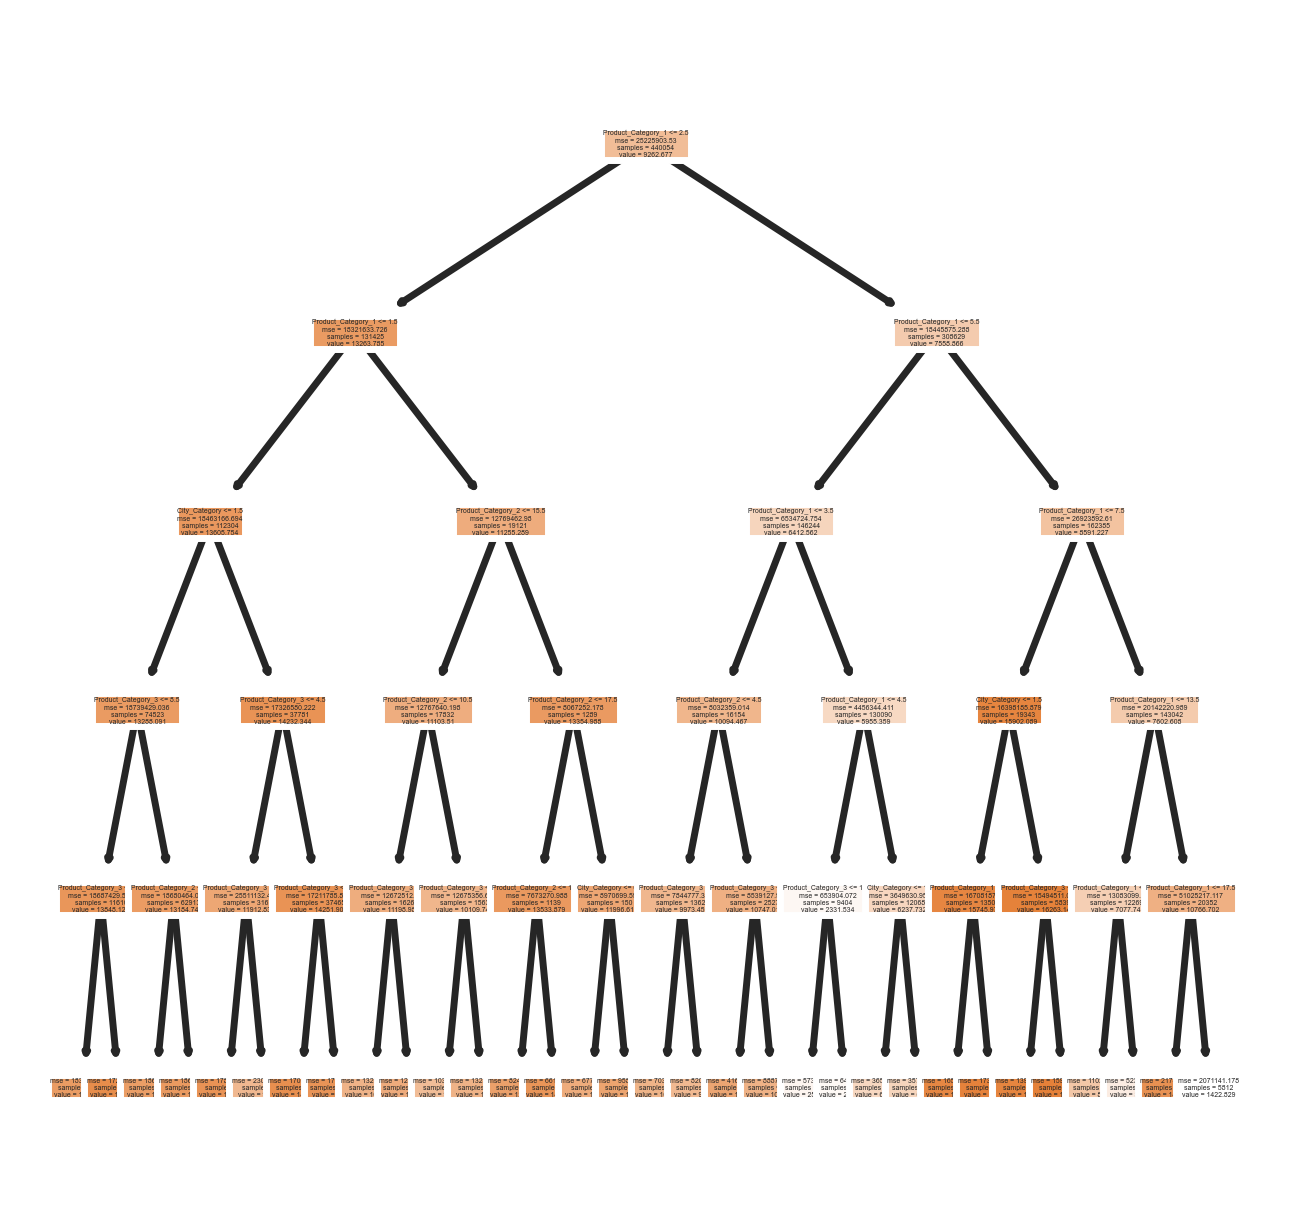

In [57]:
fn = X_train.columns
cn = ["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(DtR,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [58]:
DtR1=DecisionTreeRegressor(max_depth=5,random_state=89, criterion='mse')

DtR1.fit(X_train, y_train)

print("Train Accuracy:", DtR1.score(X_train,y_train))
print("Test Accuracy:", DtR1.score(X_test,y_test))

Train Accuracy: 0.5790609087415428
Test Accuracy: 0.5801263155414075


In [59]:
DtR2 = DecisionTreeRegressor(max_depth=5,random_state=89, criterion='mse',min_samples_split=2, min_samples_leaf=1,)

DtR2.fit(X_train, y_train)

print("Train Accuracy:", DtR2.score(X_train,y_train))
print("Test Accuracy:", DtR2.score(X_test,y_test))

Train Accuracy: 0.5790609087415428
Test Accuracy: 0.5801263155414075


In [60]:
y_Predict= DtR.predict(X_test)
y_Predict

array([14131.70045467,  3642.59561082, 15927.31898377, ...,
       12943.65762521, 12943.65762521, 15646.0305133 ])

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mean_absolute_error(y_test, y_Predict)

2409.06675956043

In [62]:
mean_squared_error(y_test, y_Predict)

10602672.460348902

In [63]:
r2_score(y_test, y_Predict)

0.5801263155414075

In [64]:
print("RMSE of the Model is ",sqrt(mean_squared_error(y_test, y_Predict)))
print ('MSE of The Model is',mean_squared_error(y_test, y_Predict))

RMSE of the Model is  3256.174513190118
MSE of The Model is 10602672.460348902


In [65]:
DT_RMSE = round (sqrt(mean_squared_error(y_test, y_Predict)),2)
DT_MSE = round (mean_squared_error(y_test, y_Predict),2)
DT_MAE = round (mean_absolute_error(y_test, y_Predict),2)
DT_R2_score = round (r2_score(y_test, y_Predict),2)

print (DT_RMSE)
print (DT_MSE)
print (DT_MAE)
print (DT_R2_score)

3256.17
10602672.46
2409.07
0.58


ANALYSIS : We can see here we are using our best parameters here but still we are not getting good accuracy. 

### ALGORITHM - RANDOM FOREST

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
Rf=RandomForestRegressor(max_depth=2, random_state=0)

In [68]:
#help(Rf)

In [69]:
Rf.fit(X_train, y_train)

print("Train Accuracy:", Rf.score(X_train, y_train))
print("Test Accuracy:", Rf.score(X_test,y_test))

Train Accuracy: 0.31127654769035895
Test Accuracy: 0.31003297877380664


In [70]:
Rf1 = RandomForestRegressor(random_state=0)

In [71]:
Rf1.fit(X_train, y_train)

print("Train Accuracy:", Rf1.score(X_train, y_train))
print("Test Accuracy:", Rf1.score(X_test,y_test))

Train Accuracy: 0.7915186133460376
Test Accuracy: 0.6320648166600967


In [72]:
rf_y_pred = Rf1.predict(X_test)
rf_y_pred

array([15285.32033333,  1212.68471429, 16230.93178571, ...,
       16123.7149026 , 14942.74111575, 14448.025     ])

In [73]:
# CHECKING MEAN SQUARED ERROR & ROOT MEAN SQUARED ERROR 

Rf_RMSE = round (sqrt(mean_squared_error(y_test, rf_y_pred)),2)
Rf_MSE = round (mean_squared_error(y_test, rf_y_pred),2)
Rf_MAE = round (mean_absolute_error(y_test, rf_y_pred),2)
Rf_R2_score = round (r2_score(y_test, rf_y_pred),2)

print ("RMSE of the Model is ", Rf_RMSE)
print ('MSE of The Model is', Rf_MSE)
print('MAE of The Model is', Rf_MAE)
print ('R2_score of The Model is', Rf_R2_score)

RMSE of the Model is  3048.13
MSE of The Model is 9291118.69
MAE of The Model is 2216.66
R2_score of The Model is 0.63


### ALGORITHM - XgBOOST

In [74]:
# INSTALLING XgBOOST

!pip install xgboost

In [75]:
from xgboost import XGBRFRegressor

In [76]:
#help(Xgbr)

In [77]:
Xgbr = XGBRFRegressor(learning_rate=1.0, max_depth=7, min_child_weight=45, seed=54)

Xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=7, min_child_weight=45, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=54, reg_alpha=0,
               scale_pos_weight=1, seed=54, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [78]:
print("Train Accuracy:", Xgbr.score(X_train, y_train))
print("Test Accuracy:", Xgbr.score(X_test,y_test))

Train Accuracy: 0.6421763963689775
Test Accuracy: 0.6423084553133471


In [79]:
Xgbr1 = XGBRFRegressor(learning_rate=1.0, max_depth=5, min_child_weight=30, seed=54)

Xgbr1.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=5, min_child_weight=30, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=54, reg_alpha=0,
               scale_pos_weight=1, seed=54, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [80]:
print("Train Accuracy:", Xgbr1.score(X_train, y_train))
print("Test Accuracy:", Xgbr1.score(X_test,y_test))

Train Accuracy: 0.5416854131174217
Test Accuracy: 0.542098000675298


In [81]:
Xgbr2 = XGBRFRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=54)

Xgbr2.fit(X_train, y_train)

print("Train Accuracy:", Xgbr2.score(X_train, y_train))
print("Test Accuracy:", Xgbr2.score(X_test,y_test))

Train Accuracy: 0.6118683961781575
Test Accuracy: 0.6123294031498159


In [82]:
Xgbr3 = XGBRFRegressor(learning_rate=1, max_depth=8, min_child_weight=54, 
                      seed=54, n_estimators = 300, gamma=1)

Xgbr3.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=1, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=8,
               min_child_weight=54, missing=nan, monotone_constraints='()',
               n_estimators=300, n_jobs=8, num_parallel_tree=300,
               objective='reg:squarederror', predictor='auto', random_state=54,
               reg_alpha=0, scale_pos_weight=1, seed=54, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [83]:
print("Train Accuracy:", Xgbr3.score(X_train, y_train))
print("Test Accuracy:", Xgbr3.score(X_test,y_test))

Train Accuracy: 0.6517529293901936
Test Accuracy: 0.6515564053294314


In [84]:
Xgbr4 = XGBRFRegressor(learning_rate=1, max_depth=12, min_child_weight=64, 
                      seed=54, n_estimators = 900, gamma=1)

Xgbr4.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=1, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=12,
               min_child_weight=64, missing=nan, monotone_constraints='()',
               n_estimators=900, n_jobs=8, num_parallel_tree=900,
               objective='reg:squarederror', predictor='auto', random_state=54,
               reg_alpha=0, scale_pos_weight=1, seed=54, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [85]:
print("Train Accuracy:", Xgbr4.score(X_train, y_train))
print("Test Accuracy:", Xgbr4.score(X_test,y_test))

Train Accuracy: 0.6670118587119265
Test Accuracy: 0.6626945720104845


In [86]:
Xgbr5 = XGBRFRegressor(learning_rate=1, max_depth=14, min_child_weight=64, 
                      seed=54, n_estimators = 1000, gamma=1)

Xgbr5.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=1, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=14,
               min_child_weight=64, missing=nan, monotone_constraints='()',
               n_estimators=1000, n_jobs=8, num_parallel_tree=1000,
               objective='reg:squarederror', predictor='auto', random_state=54,
               reg_alpha=0, scale_pos_weight=1, seed=54, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [87]:
print("Train Accuracy:", Xgbr5.score(X_train, y_train))
print("Test Accuracy:", Xgbr5.score(X_test,y_test))

Train Accuracy: 0.6710382047007678
Test Accuracy: 0.6640557586143383


ANALYSIS : If we conculude above three accuracies then our best parameters are learning_rate=1, max_depth=14, min_child_weight=64, seed=54, n_estimators = 1000, gamma=1. We are getting best results on these parameters. 

In [88]:
Xgbr_y_Pred_train = Xgbr5.predict(X_train)
Xgbr_y_Pred_train

array([7581.3374, 8120.5806, 7574.4233, ..., 6534.815 , 9907.785 ,
       8304.229 ], dtype=float32)

In [89]:
Xgbr_y_Pred_test = Xgbr5.predict(X_test)
Xgbr_y_Pred_test

array([12325.788 ,  1350.6461, 15759.357 , ..., 12851.243 , 14617.064 ,
       15201.657 ], dtype=float32)

In [90]:
XgBoost_RMSE = round (sqrt(mean_squared_error(y_test, Xgbr_y_Pred_test)),2)
XgBoost_MSE = round (mean_squared_error(y_test, Xgbr_y_Pred_test),2)
XgBoost_MAE = round (mean_absolute_error(y_test, Xgbr_y_Pred_test),2)
XgBoost_R2_score = round (r2_score(y_test, Xgbr_y_Pred_test),2)

print ("RMSE of the Model is ", XgBoost_RMSE)
print ('MSE of the Model is', XgBoost_MSE)
print ('MAE of the Model is', XgBoost_MAE)
print ('R2_score of the Model is', XgBoost_R2_score)

RMSE of the Model is  2912.61
MSE of the Model is 8483281.73
MAE of the Model is 2182.4
R2_score of the Model is 0.66


### COMPARISONS OF THE MODELS

In [91]:
Col_Name=["Model Name","Accuracy","RMSE","MSE","MAE", "R2 Score"]

In [92]:
Model_Name=["Linear Regression","Decision Tree","Random Forest","XgBoost"]

In [112]:
Accuracy = [round (LR.score(X_test, y_test),2), round (DtR.score(X_test,y_test), 2), 
            round (Rf1.score(X_test,y_test), 2), round(Xgbr5.score(X_test,y_test), 2)]

In [94]:
RMSE = [LR_RMSE, DT_RMSE, Rf_RMSE, XgBoost_RMSE]

In [95]:
MSE = [LR_MSE, DT_MSE, Rf_MSE, XgBoost_MSE]

In [96]:
MAE = [LR_MAE, DT_MAE, Rf_MAE, XgBoost_MAE]

In [97]:
R2_Score = [LR_R2_score, DT_R2_score, Rf_R2_score, XgBoost_R2_score] 

In [113]:
Comp =(Model_Name,Accuracy,RMSE,MSE,R2_Score)

In [114]:
Comp_df=pd.DataFrame(Comp)

In [115]:
Comparison_df=pd.DataFrame(data=list(zip(Model_Name,Accuracy,RMSE,MSE, MAE,R2_Score)),columns=Col_Name)

In [116]:
Comparison_df

,Model Name,Accuracy,RMSE,MSE,MAE,R2 Score
0,Linear Regression,0.16,4614.54,21294021.20,3518.82,0.16
1,Decision Tree,0.58,3256.17,10602672.46,2409.07,0.58
2,Random Forest,0.63,3048.13,9291118.69,2216.66,0.63
3,Xg Boost,0.66,2912.61,8483281.73,2182.40,0.66


### CONCLUSION

As we can see that XgBoost has least RMSE value in the dataframe. So, we will see the prediction on the basis of that.

## TESTING DATA

In [102]:
Test_Data = pd.read_csv (r"E:\Data Science\Black Friday\test.csv")
Test_Data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


#### EXPLORATORY DATA ANALYSIS

In [103]:
# DROPPING UNIQUE VARIABLES
Test_Data.drop (columns = ['User_ID', 'Product_ID'], inplace = True)

In [104]:
# FILLING MISSING VALUES
Test_Data['Product_Category_2'] =Test_Data['Product_Category_2'].fillna(0).astype('int64')
Test_Data['Product_Category_3'] =Test_Data['Product_Category_3'].fillna(99).astype('int64')

In [105]:
# CONVERSION FROM CATEGORICAL TO NUMERICAL 
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()

Test_Data ['Gender']= LE.fit_transform(Test_Data['Gender'])
Test_Data ['Age']= LE.fit_transform(Test_Data['Age'])
Test_Data ['City_Category']= LE.fit_transform(Test_Data['City_Category'])
Test_Data ['Stay_In_Current_City_Years']= LE.fit_transform(Test_Data['Stay_In_Current_City_Years'])

In [106]:
Test_Data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11,99
1,1,2,17,2,0,0,3,5,99
2,0,3,1,1,4,1,5,14,99
3,0,3,1,1,4,1,4,9,99
4,0,2,1,2,1,0,4,5,12
...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4,1,8,0,99
233595,0,2,15,1,4,1,5,8,99
233596,0,2,15,1,4,1,1,5,12
233597,0,4,1,2,4,0,10,16,99


In [107]:
# PREDICTING THE DATA BY USING XgBOOST ALGORITHM
Pred_Test=Xgbr.predict(Test_Data)
Pred_Test

array([13121.95  , 10751.24  ,  6181.378 , ..., 12910.851 , 16279.215 ,
        2249.4092], dtype=float32)

In [108]:
Pred_data = pd.DataFrame(Pred_Test,columns=['Purchase'])
Pred_data

,Purchase
0,13121.950195
1,10751.240234
2,6181.377930
3,2598.914307
4,2530.446777
...,...
233594,7553.885742
233595,6274.397949
233596,12910.850586
233597,16279.214844


In [120]:
# FINAL SUBMISSION

Pred_data.to_csv('Prediction.csv')
# TO SEE THE RESULT KINDLY CHECK THE EXCEL FILE

_________________________________________________"END OF THE PROJECT"__________________________________________________________